In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#1. 열 이름이 잘 인식되었는지
df = pd.read_csv("C:\\Users\\user\\2024_ai_test\\car+evaluation\\car.data", names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])#따로 넣을거면 names=[] 없다면 header=None
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
#2. 열 이름 확인
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [3]:
#3. 객체 목록 확인
df['buying'].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [4]:
#4. 레이블 불균형 확인
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [5]:
#5. 결측값 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
label=LabelEncoder()
df['buying']=label.fit_transform(df['buying'])
df['maint']=label.fit_transform(df['maint'])
df['doors']=label.fit_transform(df['doors'])
df['persons']=label.fit_transform(df['persons'])
df['lug_boot']=label.fit_transform(df['lug_boot'])
df['safety']=label.fit_transform(df['safety'])
df['class']=label.fit_transform(df['class'])

In [7]:
#레이블 분리
y=df['class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [8]:
#데이터 분리
X=df.drop(['class'], axis=1)#x축 방향
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


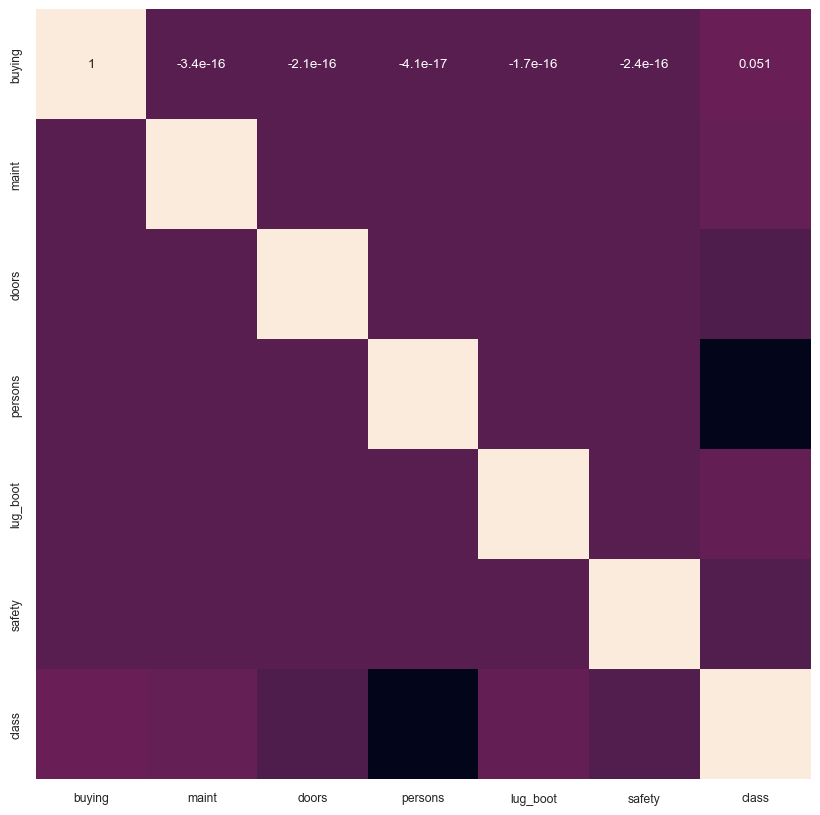

In [9]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [10]:
#훈련 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1382, 6) (1382,)
(346, 6) (346,)


In [11]:
#정규화
print("Before: ", X_train.head())
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
print("After: ", X_train[:5])

scaler = StandardScaler()
scaler.fit(X_test)
X_test=scaler.fit_transform(X_test)

Before:        buying  maint  doors  persons  lug_boot  safety
1243       2      1      2        0         2       2
1310       1      3      0        1         1       0
1584       1      2      2        2         2       1
1130       2      2      1        2         1       0
630        0      0      3        1         2       1
After:  [[ 0.44916281 -0.446472    0.42462018 -1.23772312  1.2281253   1.23728302]
 [-0.44786465  1.32404252 -1.36995197 -0.01591358  0.00969805 -1.23014142]
 [-0.44786465  0.43878526  0.42462018  1.20589596  1.2281253   0.0035708 ]
 [ 0.44916281  0.43878526 -0.47266589  1.20589596  0.00969805 -1.23014142]
 [-1.34489212 -1.33172926  1.32190626 -0.01591358  1.2281253   0.0035708 ]]


In [12]:
#1. 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets, metrics
import warnings

model1 = LogisticRegression(random_state=0)
model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred1))
print (confusion_matrix(y_test, pred1))
print(f"{metrics.classification_report(y_test, pred1)}\n")


--- Logistic Regression Classifier ---
0.6965317919075145
[[ 13   0  53   8]
 [  4   0  14   0]
 [ 20   0 224   1]
 [  2   0   3   4]]
              precision    recall  f1-score   support

           0       0.33      0.18      0.23        74
           1       0.00      0.00      0.00        18
           2       0.76      0.91      0.83       245
           3       0.31      0.44      0.36         9

    accuracy                           0.70       346
   macro avg       0.35      0.38      0.36       346
weighted avg       0.62      0.70      0.65       346




C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
#2. 랜덤포레스트
print ("\n--- Radom Forest ---")
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print(accuracy_score(y_test,pred2))
print (confusion_matrix(y_test, pred2))
print(f"{metrics.classification_report(y_test, pred2)}\n")


--- Radom Forest ---
0.9682080924855492
[[ 72   0   1   1]
 [  2  14   0   2]
 [  5   0 240   0]
 [  0   0   0   9]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        74
           1       1.00      0.78      0.88        18
           2       1.00      0.98      0.99       245
           3       0.75      1.00      0.86         9

    accuracy                           0.97       346
   macro avg       0.91      0.93      0.92       346
weighted avg       0.97      0.97      0.97       346




In [14]:
#3. 결정트리
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

pred3=model3.predict(X_test)
print(accuracy_score(y_test,pred3))
print (confusion_matrix(y_test, pred3))
print(f"{metrics.classification_report(y_test, pred3)}\n")

0.9739884393063584
[[ 71   1   2   0]
 [  1  17   0   0]
 [  5   0 240   0]
 [  0   0   0   9]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.94      0.94      0.94        18
           2       0.99      0.98      0.99       245
           3       1.00      1.00      1.00         9

    accuracy                           0.97       346
   macro avg       0.96      0.97      0.97       346
weighted avg       0.97      0.97      0.97       346




In [15]:
#DL
y_test=pd.get_dummies(y_test).values
y_train=pd.get_dummies(y_train).values
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Input((6,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,028 (35.27 KB)

 Trainable params: 9,028 (35.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32,validation_split=0.2)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6387 - loss: 1.0328 - val_accuracy: 0.7437 - val_loss: 0.6921
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.6613 - val_accuracy: 0.7292 - val_loss: 0.6276
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.6196 - val_accuracy: 0.7690 - val_loss: 0.5721
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.5639 - val_accuracy: 0.7942 - val_loss: 0.4874
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.4757 - val_accuracy: 0.8375 - val_loss: 0.4037
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 0.4022 - val_accuracy: 0.8556 - val_loss: 0.3457
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.3049 - val_accuracy: 0.8917 - val_loss: 0.2962
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.2995 - val_accuracy: 0.8736 - val_loss:

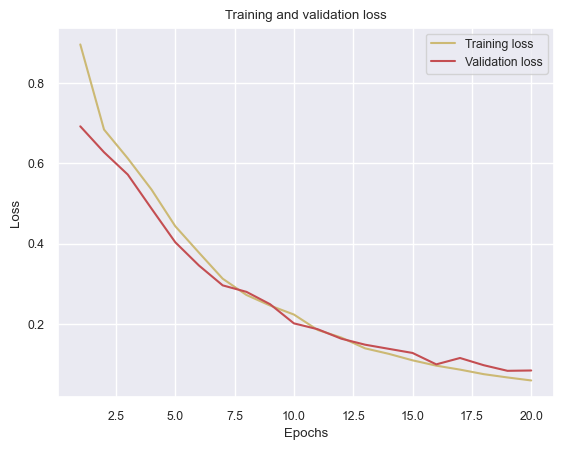

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       1.00      0.83      0.91        18
           2       0.99      0.99      0.99       245
           3       0.75      1.00      0.86         9

    accuracy                           0.97       346
   macro avg       0.92      0.95      0.93       346
weighted avg       0.98      0.97      0.97       346

[[ 71   0   2   1]
 [  1  15   0   2]
 [  3   0 242   0]
 [  0   0   0   9]]
